**Created by Kim Jinho** <br>
**📚📝📜📃 Semantic Text Similarity** <br>
**24 October 2022** 


## 📋 Table of Contents
<a id="toc"></a>
- [1. Imports](#1)
- [2. Data Loading and Preperation](#2)
- [3. Exploring Data](#3)
- [4. Data Cleansing](#4)
- [5. EDA(Exploratory Data Analysis)](#5)
- [6. Data Visualization](#6)
- [7. ML Modeling](#7)



<a id="1"></a>
## 💪 Imports 

In [1]:
# Import Library

# For Data Analysis
import os
import numpy as np                 
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns              
import plotly.express as px

<a id="2"></a>
## 🙋‍♂️ Data Loading and Preparing


In [2]:
# file path save
FILE_PATH = './data'
train_path = os.path.join(FILE_PATH, 'train.csv')
valid_path = os.path.join(FILE_PATH, 'dev.csv')
test_path = os.path.join(FILE_PATH, 'test.csv')
ss_path = os.path.join(FILE_PATH, 'sample_submission.csv')

# Load dataset
train_df = pd.read_csv(train_path, engine='python')
valid_df = pd.read_csv(valid_path, engine='python')
test_df = pd.read_csv(test_path, engine='python')
ss_df = pd.read_csv(ss_path, engine='python')

train_df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [3]:
valid_df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0
2,boostcamp-sts-v1-dev-002,nsmc-rtt,이번 년도에 본 영화 중 가장 최악의 영화......,올해 본 영화 중 최악...,4.0,1.0
3,boostcamp-sts-v1-dev-003,slack-rtt,특히 평소 뮤직채널에 많은 영감을 불어넣어주시는!,"특히, 당신은 항상 많은 음악 채널에 영감을 줍니다!",3.4,1.0
4,boostcamp-sts-v1-dev-004,slack-sampled,다음 밥스테이지가 기대됩니다~ ㅎ,다음 후기도 기대됩니다~~,1.4,0.0
...,...,...,...,...,...,...
545,boostcamp-sts-v1-dev-545,nsmc-sampled,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...,2.0,0.0
546,boostcamp-sts-v1-dev-546,slack-rtt,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,1.0
547,boostcamp-sts-v1-dev-547,nsmc-sampled,내용이 뭔 내용인지도 모르겠음,무슨의미로 만들었는지 모르겠음..,2.4,0.0
548,boostcamp-sts-v1-dev-548,slack-rtt,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)",5.0,1.0


In [4]:
test_df

,id,source,sentence_1,sentence_2
0,boostcamp-sts-v1-test-000,petition-sampled,가상화폐거래소 폐쇄하지 말고,가상화폐 거래소 폐쇄 반대합니다
1,boostcamp-sts-v1-test-001,petition-sampled,뇌물적폐1호 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하라,뇌물적폐 원조 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하세요
2,boostcamp-sts-v1-test-002,petition-rtt,기무사 영관급의 하극상 정말 이대로 방관하는게 민주주의 인지요,그냥 가만히 있는게 진짜 민주주의인가요?
3,boostcamp-sts-v1-test-003,nsmc-sampled,화까지가 한계였다.,기대가 너무 컸다...
4,boostcamp-sts-v1-test-004,slack-rtt,왜 혼자 있지.. ㅠㅠ,왜 혼자야.. ㅠㅠ
...,...,...,...,...
1095,boostcamp-sts-v1-test-1095,slack-sampled,"슬랙 채널 개편: 현재 75개의 채널들이 있는데 사용되지 않는 채널들은 정리하고, ...",오늘 슬랙의 채널 및 사용 권한에 대한 변경이 있을 예정입니다!
1096,boostcamp-sts-v1-test-1096,petition-rtt,청소년보호법 폐지 청원합니다,청소년보호법 폐지 청원서
1097,boostcamp-sts-v1-test-1097,petition-rtt,존경하는 문대통령님 상서 경유 자동차 단속 대상은 매연이 마니 나오는 화물자동차에 ...,"친애하는 문 대통령님, 디젤차량 단속이 매연을 내는 트럭으로 제한되기를 간절히 기도..."
1098,boostcamp-sts-v1-test-1098,nsmc-rtt,요즘 재미가 훅 떨어짐...,요즘 재미가 사라졌다...


<a id="3"></a>
## 🔍 Exploring Data


In [5]:
# print train_df DataFrame
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB


In [6]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            550 non-null    object 
 1   source        550 non-null    object 
 2   sentence_1    550 non-null    object 
 3   sentence_2    550 non-null    object 
 4   label         550 non-null    float64
 5   binary-label  550 non-null    float64
dtypes: float64(2), object(4)
memory usage: 25.9+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1100 non-null   object
 1   source      1100 non-null   object
 2   sentence_1  1100 non-null   object
 3   sentence_2  1100 non-null   object
dtypes: object(4)
memory usage: 34.5+ KB


<a id="4"></a>
## ✂️ Data Cleansing

<span style='color:red'>생략 예정</span>

<a id="5"></a>
## ✈️ EDA(Exploratory Data Analysis)

`binary-label` : 문장 쌍에 대한 유사도가 2점 이하인 경우엔 0으로, 3점 이상인 경우엔 1로 변환한 binary label 입니다.

정확히는 2.5 미만인 경우엔 0으로, 2.5 이상인 경우엔 1로 변환한 binary label 입니다.

In [8]:
train_df['binary-label'].value_counts()

0.0    5692
1.0    3632
Name: binary-label, dtype: int64

In [9]:
train_df[(train_df['label'] == 2.5)].head()

,id,source,sentence_1,sentence_2,label,binary-label
137,boostcamp-sts-v1-train-137,slack-rtt,"평화로 어딘가일 경우, 한수위",평화로운 곳이라면 최고,2.5,1.0
360,boostcamp-sts-v1-train-360,petition-rtt,저희 같은 판매 영업직도 쉬게 해주세요,우리 같은 영업사원은 잠시 쉬도록 하세요.,2.5,1.0
1324,boostcamp-sts-v1-train-1324,slack-sampled,쾌청한 날씨만큼 좋은 한주의 시작되길 바라면서 #하우아유,오늘도 좋은 하루 보내고 계신가요! 하우아유,2.5,1.0
1449,boostcamp-sts-v1-train-1449,petition-sampled,청소년법 폐기 건의 드립니다.,청소년보호법 폐지와 학생자율화 폐지 건의합니다.,2.5,1.0
1561,boostcamp-sts-v1-train-1561,petition-sampled,학자금대출받고 졸업 후 취업못해 신용불량자가 된 청년실업자의 채무를 탕감해 주세요.,한국장학재단학자금대출로 사회출발점부터 채무자가 되는 젊은 사람들을 위한 구제법안을 ...,2.5,1.0


In [10]:
train_df[(train_df['label'] >= 2.5)]

,id,source,sentence_1,sentence_2,label,binary-label
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
5,boostcamp-sts-v1-train-005,nsmc-rtt,오마이가뜨지져스크롸이스트휏,오 마이 갓 지저스 스크론 이스트 팬,2.6,1.0
6,boostcamp-sts-v1-train-006,slack-rtt,전 암만 찍어도 까만 하늘.. ㅠㅠ,암만 찍어도 하늘은 까맣다.. ㅠㅠ,3.6,1.0
9,boostcamp-sts-v1-train-009,petition-sampled,크림하우스 환불조치해주세요.,크림하우스 환불조치할 수 있도록해주세여,4.2,1.0
...,...,...,...,...,...,...
9310,boostcamp-sts-v1-train-9310,petition-sampled,음주운전 처벌 강화,음주운전 처벌 강화해주세요,4.0,1.0
9314,boostcamp-sts-v1-train-9314,petition-sampled,박상기 현 법무부 장관 해임,박상기 법무장관 해임 바랍니다,3.8,1.0
9318,boostcamp-sts-v1-train-9318,petition-rtt,워마드 회원에 대해 테러방지법 적용을 검토해주세요.,Warmad 회원에 대한 테러 방지법 적용을 검토하십시오.,4.4,1.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0


In [11]:
train_df['source'].value_counts()

petition-sampled    2352
nsmc-sampled        2296
slack-sampled       2024
slack-rtt           1047
petition-rtt         817
nsmc-rtt             788
Name: source, dtype: int64

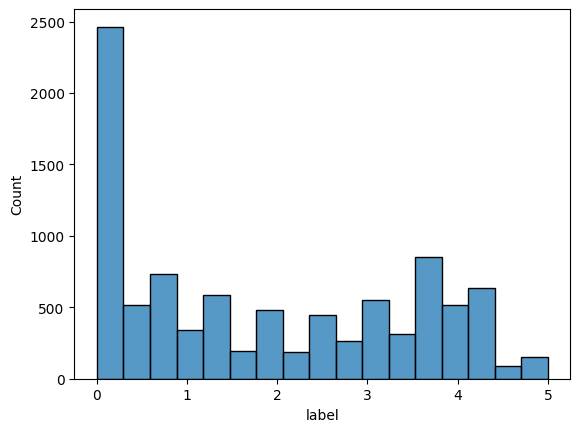

<Figure size 100x200 with 0 Axes>

In [12]:
sns.histplot(data=train_df, x="label")

plt.figure(figsize=(1, 2))
plt.show()

In [13]:
train_df.iloc[4]

id              boostcamp-sts-v1-train-004
source                       slack-sampled
sentence_1                      뿌듯뿌듯 하네요!!
sentence_2           꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!
label                                  0.0
binary-label                           0.0
Name: 4, dtype: object

In [14]:
train_df.iloc[3]

id                boostcamp-sts-v1-train-003
source                         slack-sampled
sentence_1            입사후 처음 대면으로 만나 반가웠습니다.
sentence_2      화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.
label                                    3.0
binary-label                             1.0
Name: 3, dtype: object

In [15]:
train_df.iloc[9319]

id                                boostcamp-sts-v1-train-9319
source                                       petition-sampled
sentence_1               교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다
sentence_2      본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요
label                                                     0.2
binary-label                                              0.0
Name: 9319, dtype: object

In [16]:
bins = [-0.1, 0.0, 0.9, 1.9, 2.9, 3.9, 4.9, 5]
df_label_bins = pd.cut(train_df['label'], bins, labels=['0.0','0.1~0.9', '1.0~1.9', '2.0~2.9', 
                                                        '3.0~3.9', '4.0~4.9', '5.0'])

# train_df 복사
new_train_df = train_df.copy()
new_train_df['label-binning'] = df_label_bins
new_train_df['label-binning']

0       2.0~2.9
1       4.0~4.9
2       2.0~2.9
3       3.0~3.9
4           0.0
         ...   
9319    0.1~0.9
9320    4.0~4.9
9321    0.1~0.9
9322    3.0~3.9
9323    1.0~1.9
Name: label-binning, Length: 9324, dtype: category
Categories (7, object): ['0.0' < '0.1~0.9' < '1.0~1.9' < '2.0~2.9' < '3.0~3.9' < '4.0~4.9' < '5.0']

5 이상이 적어보이지만 사실 '5 group'은 딱 5.0 밖에 없기 때문에 <br>
Data augmentation을 하는 것이 맞는지 고민중...

'2 group', '3 group'은 augmenation을 진행해도 좋을듯!

In [17]:
new_train_df['label-binning'].value_counts().sort_index()

0.0        2119
0.1~0.9    1592
1.0~1.9    1368
2.0~2.9    1137
3.0~3.9    1715
4.0~4.9    1302
5.0          91
Name: label-binning, dtype: int64

파이차트  (퍼센트 자료 만들기) <br>

focal loss <br>
    https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html


In [24]:
value_list = [5.0, 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1, 4.0]

for value in value_list :
    tmp = new_train_df[new_train_df['label']==value]
    print(value, len(tmp))

5.0 91
4.9 0
4.8 59
4.7 0
4.6 81
4.5 11
4.4 209
4.3 0
4.2 426
4.1 0
4.0 516


<a id="6"></a>
## 📊 Data Visualization

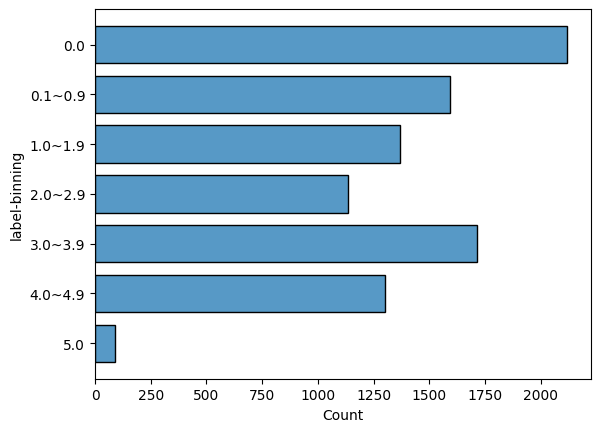

<Figure size 400x600 with 0 Axes>

In [23]:
sns.histplot(data=new_train_df, y="label-binning", shrink=.75)

plt.figure(figsize=(4, 6))
plt.show()

## 📝 Reference

Reference Notebook.

* https://www.kaggle.com/code/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/code/odins0n/spaceship-titanic-eda-27-different-models
* https://www.kaggle.com/code/tangelus/english-language-learning-vectorization-lgbm

Reference Site.
* https://www.data-to-viz.com/